In [1]:
"""
This notebook reads MLS, ERAi trajectory, MERRA2 trajectory water vapor data.
We get the zonal mean water vapor seasonal cycle and June-July-August (JJA) water vapor.
Then we plot the data.
"""

'\nThis notebook reads MLS, ERAi trajectory, MERRA2 trajectory water vapor data.\nWe get the zonal mean water vapor seasonal cycle and June-July-August (JJA) water vapor.\nThen we plot the data.\n'

In [1]:
import numpy as np
import pandas as pd
import xarray as xr 
from seasonal_cycle_analysis_functions import *
import matplotlib.pyplot as plt
#%matplotlib inline
degree_sign= u'\N{DEGREE SIGN}'
from string import ascii_lowercase
import calendar
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Read data

In [2]:
indir = '/mnt/data/ice2/xwang/ACP2019_data_code/data/'
#--- specify file names to read
fname1 = ['MLS_h2omix.nc',\
         'erai_TrajStandard_h2omix.nc',\
         'merra2_TrajStandard_h2omix.nc',\
         'erai_TrajCM_h2omix.nc',\
         'merra2_TrajCM_h2omix.nc']
fname2 = ['MLS_temperature.nc',\
         'erai_temperature.nc',\
         'merra2_temperature.nc',\
         'erai_temperature.nc',\
         'merra2_temperature.nc']



#--- define arrays to store data
nfile = 5
nmonth = 12
nlev = 3
nlat = 45
nlon = 45
h2o_mix = np.zeros((nfile,nmonth,nlev,nlat)) # stores zonal mean h2o seasonal cycle
t = np.zeros((nfile,nmonth,nlev,nlat))       # stores zonal mean temperature seasonal cycle 
h2o_mix2 = np.zeros((nfile,nlev,nlat,nlon))  # stores JJA mean h2o 
t2 = np.zeros((nfile,nlev,nlat,nlon))   # stores JJA mean temperature 

#--- begin reading data from file

for i,fn1,fn2 in zip(range(nfile),fname1,fname2):
    #--- read water vapor data
    ff=xr.open_dataset(indir+fn1)
    ff['time']=pd.to_datetime(ff.time, format='%Y%m')
    h2o_mix[i,:] = ff.h2o_mix.sel(time=slice('2004-08-01','2018-10-31')).groupby('time.month').mean(dim='time').mean(dim='longitude').values
    h2o_mix2[i,:] = ff.h2o_mix.sel(time=slice('2004-08-01','2018-10-31')).groupby('time.season').mean(dim='time').sel(season='JJA').values
    ff.close()
    
    #--- read temperature data
    ff=xr.open_dataset(indir+fn2)
    ff['time']=pd.to_datetime(ff.time, format='%Y%m')
    t[i,:] = ff.temperature.sel(time=slice('2004-08-01','2018-10-31')).groupby('time.month').mean(dim='time').mean(dim='longitude').values
    t2[i,:] = ff.temperature.sel(time=slice('2004-08-01','2018-10-31')).groupby('time.season').mean(dim='time').sel(season='JJA').values
    if i == nfile-1:
        lat = ff.latitude.values
        lon = ff.longitude.values
    ff.close()

/usr/local/anaconda/lib/python3.7/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Begin plotting Figures

In [3]:
#--- pre-define some variables to aid the plotting

#--- specify vmin, vmax, y/x ticks
vmax = 6
vmin = 2
levels = np.linspace(vmin,vmax,20)
levelt = np.array([190,193,195,205])
fmt = {}
strs = np.array([np.str(np.int(i)) for i in levelt])
for l,s in zip(levelt,strs):
    fmt[l] = s
xt = np.arange(1,13,1)
lattick = [-40,-20,0,20,40]
lontick = [0,120,240,360]

#--- titles, ylabels, xlabels, ticklabels, etc
titles = ['MLS','ERAi trajectory','MERRA-2 trajectory','ERAi trajectory+CM','MERRA-2 trajectory+CM']
latstr = ['40'+degree_sign+' S','20'+degree_sign+' S','0','20'+degree_sign+' N','40'+degree_sign+' N']
lonstr = ['0'+degree_sign+' E','120'+degree_sign+' E','240'+degree_sign+' E','360'+degree_sign+' E']
prstr = ['100 hPa','82.5 hPa', '68 hPa']
xtk = np.array([calendar.month_abbr[i][0] for i in xt]) 

/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


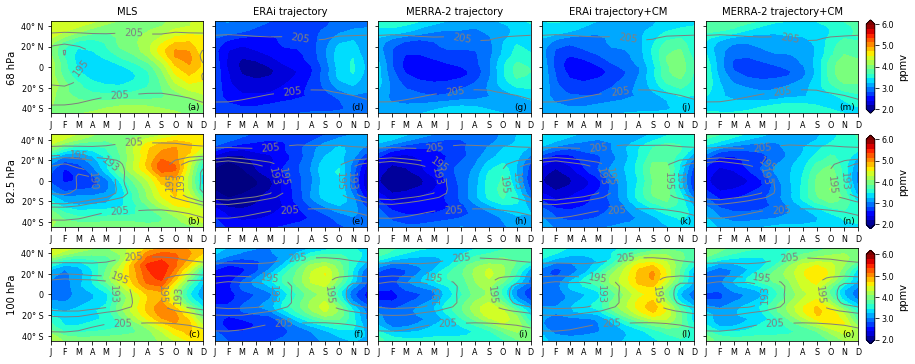

In [4]:
fig,ax = plt.subplots(nrows=3,ncols=5,sharey=True)
fig.set_size_inches(12,5, forward=True)

ycbar = [0.69,0.37,0.05]  # these are the position of the colorbars
k=0
for i,ivar in zip(range(nlev),range(nlev)[::-1]):
    llabel = ascii_lowercase[i::3]
    for j in range(nfile):           
        ima = ax[i][j].contourf(xt,lat,h2o_mix[j,:,ivar,:].T,\
                                cmap='jet',levels=levels,extend='both')  # plot water vapor data        
        cs = ax[i][j].contour(xt,lat,t[j,:,ivar,:].T,\
                              colors='gray',levels=levelt,linewidths=1)  # plot temperature data
        
        ax[i][j].clabel(cs,cs.levels,inline=True,fmt=fmt,fontsize=10)    # label the temperature lines 
        ax[i][j].set_xticks(xt)                                          # set ticks and labels, etc.
        ax[i][j].set_xticklabels(xtk,fontsize=8)
        ax[i][j].set_yticks(lattick)
        ax[i][j].set_yticklabels(latstr,fontsize=8)
        ax[i][j].set_ylim([-45,45])
        ax[i][j].annotate('('+llabel[j]+')',xy=(0.98,0.02),\
                          xycoords='axes fraction',size=9,ha='right',va='bottom')   
        
        ax[0][j].set_title(titles[j],fontsize=10) 
    ax[i][0].set_ylabel(prstr[ivar],fontsize=10)
    cbaxes = fig.add_axes([1,ycbar[i],0.01,0.26])    
    colorbar_setting(fig,ima,ax[i][-1],vmin,vmax,5,'ppmv',cbaxes)
    
plt.tight_layout(h_pad=0.5,pad=0.5)


/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/usr/local/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


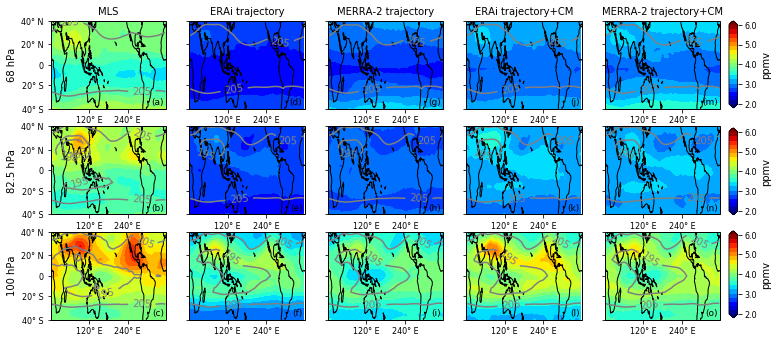

In [5]:
proj = ccrs.Mercator(central_longitude=180)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig,ax = plt.subplots(nrows=3,ncols=5,sharey=True,subplot_kw={'projection': proj})
fig.set_size_inches(12,5.5, forward=True)

ycbar = [0.66,0.39,0.13]  # these are the position of the colorbars

k=0
for i,ivar in zip(range(nlev),range(nlev)[::-1]):
    llabel = ascii_lowercase[i::3]
    for j in range(nfile):
        ax[i][j].set_aspect('auto')            
        ima = ax[i][j].contourf(lon,lat,h2o_mix2[j,ivar,:],cmap='jet',\
                                levels=np.linspace(vmin,vmax,20),extend='both',\
                                transform=ccrs.PlateCarree())             # plot water vapor data
        cs = ax[i][j].contour(lon,lat,t2[j,ivar,:],levels=levelt,\
                              colors='gray',transform=ccrs.PlateCarree()) # plot temperature data         
        ax[i][j].clabel(cs,cs.levels,inline=True,fmt=fmt,fontsize=10)     # label the temperature lines
        ax[i][j].coastlines()                                             # set ticks and labels, etc.
        ax[i][j].xaxis.set_major_formatter(lon_formatter)
        ax[i][j].yaxis.set_major_formatter(lat_formatter)
        ax[i][j].set_yticks(lattick,crs=ccrs.PlateCarree())
        ax[i][j].set_yticklabels(latstr,fontsize=8)
        ax[i][j].set_xticks(lontick,crs=ccrs.PlateCarree())
        ax[i][j].set_xticklabels(lonstr,fontsize=8)
        ax[i][j].set_extent([1,359,-40,40],crs=ccrs.PlateCarree())
        ax[i][j].annotate('('+llabel[j]+')',xy=(0.98,0.02),\
                          xycoords='axes fraction',size=9,ha='right',va='bottom')   
        ax[0][j].set_title(titles[j],fontsize=10) 
    ax[i][0].set_ylabel(prstr[ivar],fontsize=10)
    cbaxes = fig.add_axes([0.91,ycbar[i],0.01,0.22])    
    colorbar_setting(fig,ima,ax[i][-1],vmin,vmax,5,'ppmv',cbaxes)
    
plt.tight_layout(h_pad=0.5)
